In [67]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection
from keras import regularizers

In [68]:
def padronizar_normal(matriz_X):
    for i in range(np.shape(matriz_X)[1]):
        matriz_X[:,i] = (matriz_X[:,i] - np.mean(matriz_X[:,i]))/np.std(matriz_X[:,i]) # X menos media/desvio padrao

    return matriz_X

# Leitura da instância e atribuição do X e do Y

In [69]:
data = pd.read_csv('instancias modelos/dataset_3T23_22.csv', index_col=0)
data

,1T_Dívida Líquida,1T_EBIT,1T_Lucro Líquido,1T_ROE,1T_Receita Líquida,2T_Dívida Líquida,2T_EBIT,2T_Lucro Líquido,2T_ROE,2T_Receita Líquida,3T_Dívida Líquida,3T_EBIT,3T_Lucro Líquido,3T_ROE,3T_Receita Líquida,Classificação
Empresa,,,,,,,,,,,,,,,,
PETR4 - 2022,1.898480e+11,6.539800e+10,4.478300e+10,10.26,1.416410e+11,1.803670e+11,9.643400e+10,5.448400e+10,13.23,1.709600e+11,2.567150e+11,7.461200e+10,4.623600e+10,12.37,1.700760e+11,0
OIBR3 - 2022,2.854196e+10,-3.693700e+08,1.783950e+09,172.14,2.486940e+09,1.616768e+10,-6.114000e+08,-3.206600e+08,-41.52,2.579520e+09,1.836537e+10,-9.924200e+08,-3.062460e+09,-134.16,2.770060e+09,0
B3SA3 - 2022,-5.093250e+09,1.430770e+09,1.101040e+09,5.05,2.284700e+09,-2.477130e+09,1.399600e+09,1.092280e+09,5.29,2.241630e+09,-2.874606e+09,1.415720e+09,1.030000e+09,5.04,2.510000e+09,0
ITSA4 - 2022,4.888000e+09,4.167000e+09,3.859000e+09,5.67,2.131000e+09,5.137000e+09,3.270000e+09,3.181000e+09,4.56,2.214000e+09,7.387000e+09,3.961000e+09,3.651000e+09,5.02,2.161000e+09,0
ABEV3 - 2022,-1.124731e+10,4.162330e+09,3.528840e+09,4.32,1.843915e+10,-1.246893e+10,4.034080e+09,3.064050e+09,3.44,1.798900e+10,-1.607987e+10,4.054970e+09,3.215010e+09,3.45,2.058764e+10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BAHI3 - 2023,1.771930e+08,-7.610000e+06,-1.787200e+07,-30.31,8.677900e+07,1.673060e+08,1.138000e+06,-1.412700e+07,-22.00,1.009340e+08,1.785970e+08,-5.970000e+05,-1.500500e+07,-45.80,9.422500e+07,0
NEXP3 - 2023,4.833700e+07,-1.329800e+07,-1.784300e+07,-18.42,3.006600e+07,5.018700e+07,2.646400e+07,2.987100e+07,-23.20,3.742000e+07,5.036900e+07,4.650000e+06,4.411000e+06,-4.09,-2.473000e+06,1
EMAE4 - 2023,-4.473750e+08,1.038000e+06,1.888200e+07,1.65,1.375520e+08,-4.688340e+08,1.028100e+07,3.784800e+07,3.39,1.387540e+08,-4.570160e+08,3.952600e+07,4.110200e+07,3.55,1.735960e+08,1


In [70]:
print(data['Classificação'].value_counts())
#Retire 45 linhas de classificacao = 0
data = data.drop(data[data.Classificação == 1].sample(49).index)
data['Classificação'].value_counts()

Classificação
1    210
0    161
Name: count, dtype: int64


Classificação
0    161
1    161
Name: count, dtype: int64

In [71]:
X = np.array(data.drop(['Classificação'], axis = 1))
Y = np.array(data['Classificação'])
RANDOM_STATE = 3
BATCH_SIZE = 32

In [72]:
# Normalização
X = padronizar_normal(X)

In [73]:
"""# Padronização
min_values = X.min(axis=0)
max_values = X.max(axis=0)
X = (X - min_values) / (max_values - min_values)"""

'# Padronização\nmin_values = X.min(axis=0)\nmax_values = X.max(axis=0)\nX = (X - min_values) / (max_values - min_values)'

### Separando em dados de treino e teste

In [74]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, random_state=RANDOM_STATE,test_size=0.2)

In [75]:
# Separando os dados de treino em treino e validação
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X_train, Y_train, random_state=RANDOM_STATE,test_size=0.2)

In [76]:
print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_val:', X_val.shape)
print('Y_val:', Y_val.shape)

X_train: (205, 15)
Y_train: (205,)
X_val: (52, 15)
Y_val: (52,)


### Criando a rede neural

In [77]:
# Encontrando o numero de neuronios na camada escondida usando a dimensão vc
num_neuronios = (X_train.shape[0] - 10)/(10*(X_train.shape[1] + 2))
num_neuronios

1.1470588235294117

In [91]:
model = Sequential()
# Adicionando neurônios em uma camada oculta
model.add(Dense(200, input_dim=15, kernel_initializer='normal', activation='relu')) #quantidade de neuronios na camada escondida, nº de features
model.add(Dense(200, input_dim=15, kernel_initializer='normal', activation='relu')) #quantidade de neuronios na camada escondida, nº de features


model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) #camada de saída

# adicionando a taxa de aprendizado

# Compilando o modelo
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])




c:\Users\Bergson\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [92]:
#Treinando a rede neural
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=200, batch_size=BATCH_SIZE, verbose=1)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4751 - loss: 0.6996 - val_accuracy: 0.6154 - val_loss: 0.6895
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5806 - loss: 0.6870 - val_accuracy: 0.5962 - val_loss: 0.6881
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5978 - loss: 0.6852 - val_accuracy: 0.5385 - val_loss: 0.6948
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5711 - loss: 0.6748 - val_accuracy: 0.5192 - val_loss: 0.6921
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5599 - loss: 0.6810 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6007 - loss: 0.6714 - val_accuracy: 0.4423 - val_loss: 0.7000
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6077 - loss: 0.6604 - val_accuracy: 0.5000 - val_loss: 0.6954
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6030 - loss: 0.6591 - val_accuracy: 0.4808 - val_loss: 0.6967

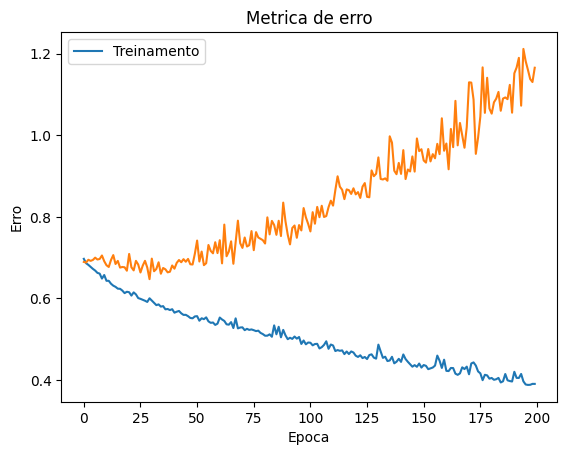

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

--> Acuracia (treino): 0.8341
--> Acuracia (validacao): 0.5385
--> acc_train - acc_val = 0.2957
Agora a validação:
[[1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]


In [93]:
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

# Obtendo a acuracia usando accuracy_score()
pred = np.round(model.predict(X_train))
acc_train = accuracy_score(Y_train, pred)

pred_val = np.round(model.predict(X_val))
acc_val = accuracy_score(Y_val, pred_val)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
pred_np = np.array(pred)
# encontrando os valores unicos de pred_np
unique, counts = np.unique(pred_np, return_counts=True)
dict(zip(unique, counts))
# exibindo esses valores unicos
print('Agora a validação:')
print(pred_val)


In [94]:
print(len(Y_val))
Y_val

52


array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [95]:
pred_val = np.array(pred_val)
print(len(pred_val))
pred_val

52


array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)